In [57]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install openpyxl

In [68]:
path = '/content/drive/MyDrive/Project COMP MSc 2024 25/Kaggle & Oasis Dataset/oasis2demographic.xlsx'

In [76]:
data = pd.read_excel(path)
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


#**Preprocessing**#

In [77]:
print(len(data.columns))

15


In [78]:
print(data.columns)

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


##Dropping Columns with majority null values##

In [79]:
#drop columsn with more than half missing values
len_data = len(data)

clean_null_values = data.dropna(axis=1, thresh=len_data/2)

In [80]:
print(len(data))

373


In [81]:
print(len(clean_null_values))

373


In [82]:
#printing the number of columns after dropping col with more than half null values
print(len(clean_null_values.columns))

15


##Imputing null rows with mean values##

In [83]:
#now we impute values in the rest of the columns- impute mean values where values are missing
#data = data.apply(lambda col: col.fillna(col.mean()), axis=0)
col_null = data.columns[data.isnull().any()].tolist()
print(col_null)

['SES', 'MMSE']


In [84]:
for i in range(len(col_null)):
  try:
    data[col_null[i]].fillna(data[col_null[i]].mean(), inplace=True)
  except:
    pass

<ipython-input-84-44e2688b8f01>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col_null[i]].fillna(data[col_null[i]].mean(), inplace=True)


In [85]:
col_null = data.columns[data.isnull().any()].tolist()
print(col_null)

[]


##Encoding Columns##

In [86]:
#encoding columns with string values
encoder = LabelEncoder()
data['M/F'] = encoder.fit_transform(data['M/F'])

mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Mapping:", mapping)

data['Hand'] = encoder.fit_transform(data['Hand'])

mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Mapping:", mapping)

data['Group'] = encoder.fit_transform(data['Group'])

mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Mapping:", mapping)



Mapping: {'F': 0, 'M': 1}
Mapping: {'R': 0}
Mapping: {'Converted': 0, 'Demented': 1, 'Nondemented': 2}


##**Exploratory Data Analysis**##

In [87]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    int64  
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(7), object(2)
memory usage: 43.8+ KB
None


In [88]:
categorical = data.select_dtypes(include=['object', 'category']).columns
numerical = data.select_dtypes(include=['number']).columns

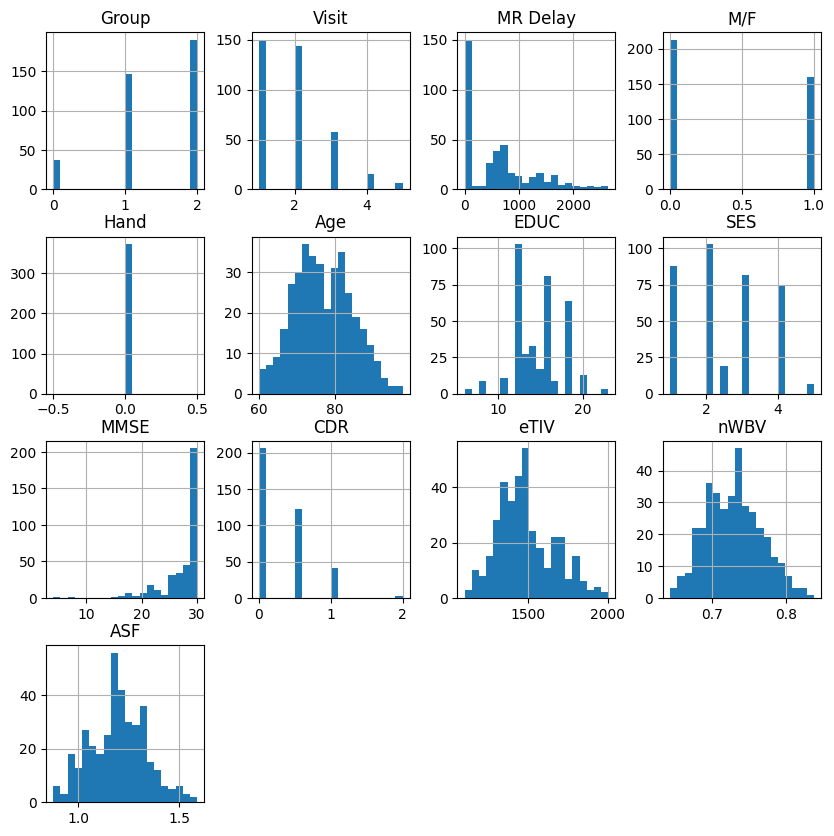

In [91]:
data[numerical].hist(figsize=(10, 10), bins=20)
plt.show()

Text(0.5, 1.0, 'Unique Values in Categorical Data')

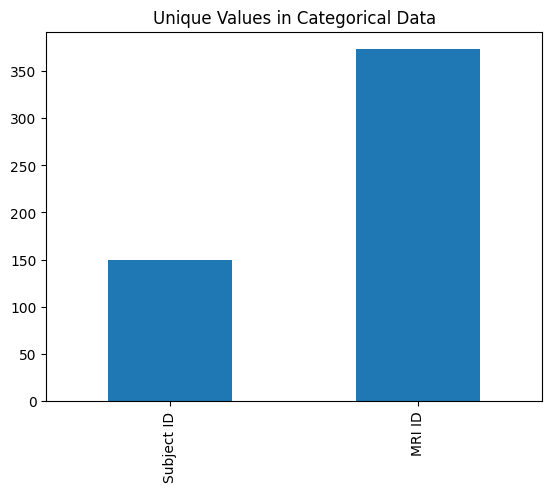

In [94]:
data[categorical].nunique().plot(kind='bar')
plt.title("Unique Values in Categorical Data")

#**Models**#

In [95]:
#this function outputs the performance of a model
def perf(test_lab, pred_lab):
  accuracy = accuracy_score(test_lab, pred_lab)
  print(f"Accuracy:" + str(accuracy))

  print("\n")

  class_report = classification_report(test_lab, pred_lab)
  print("Classification Report: \n" + str(class_report))

#this visualizes how each feature is impacting a model in prediction
def visualize(coeff):
  coeff.set_index('Feature', inplace=True)

  plt.figure(figsize=(8, 6))
  sns.heatmap(coeff, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Value'})
  plt.title('Feature Impact Heatmap')
  plt.show()

  '''
  Gender (M/F),
  Handedness (Hand),
  Age,
  Education (Educ),
  socioeconomic status (SES),
  Mini-Mental State Examination (MMSE),
  Clinical Dementia Rating (CDR),
  Estimated total intracranial volume (eTIV),
  Atlas scaling factor (ASF),
  Normalized whole brain volume (nWBV)'''

  positive_coeff = coeff[coeff['Coefficient'] > 0]
  positive_ratios = coeff[coeff['Odd Ratios'] > 1]

  print("\n")
  print("Factors contributing to likelihood according to coeff: ")
  print(tabulate(positive_coeff, headers='keys', tablefmt='grid'))
  print("\n")
  print("Factors contributing to likelihood according to odd ratios:")
  print(tabulate(positive_ratios, headers='keys', tablefmt='grid'))

##Logistic Regression##

In [96]:
X = data[['MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

y = data[['Group']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1100)

#using standard scaler as features with different scales can distort the importance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
perf(y_test,y_pred)

Accuracy:0.8533333333333334


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.94      0.97      0.95        32
           2       0.79      0.97      0.87        32

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75



In [98]:
coeff = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Coefficient': model.coef_[0]
})

coeff['Odd Ratios'] =  np.exp(coeff['Coefficient'])
print(coeff)

#positive coeff means likelihood of being demented increases with increase in the feature, negative means it decreases
#odd ratios >1 = increase likelihood, odd ratio <1 feature decrease likelihood and odd ratio =1 mean no impact

     Feature  Coefficient  Odd Ratios
0   MR Delay     0.205686    1.228367
1        M/F    -0.173735    0.840519
2       Hand     0.000000    1.000000
3        Age     0.262813    1.300583
4       EDUC    -0.019640    0.980551
5        SES    -0.583809    0.557770
6       MMSE     0.170799    1.186253
7        CDR     0.259711    1.296555
8       eTIV    -0.450105    0.637561
9       nWBV    -0.006997    0.993028
10       ASF    -0.324829    0.722651


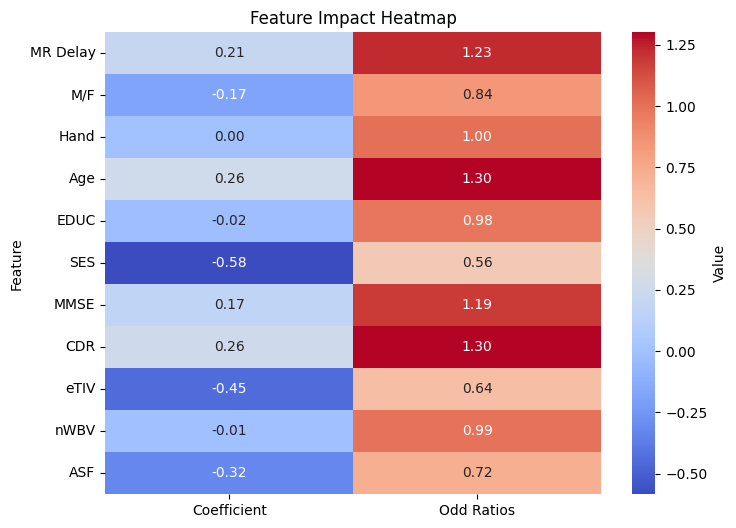



Factors contributing to likelihood according to coeff: 
+-----------+---------------+--------------+
| Feature   |   Coefficient |   Odd Ratios |
+===========+===============+==============+
| MR Delay  |      0.205686 |      1.22837 |
+-----------+---------------+--------------+
| Age       |      0.262813 |      1.30058 |
+-----------+---------------+--------------+
| MMSE      |      0.170799 |      1.18625 |
+-----------+---------------+--------------+
| CDR       |      0.259711 |      1.29655 |
+-----------+---------------+--------------+


Factors contributing to likelihood according to odd ratios:
+-----------+---------------+--------------+
| Feature   |   Coefficient |   Odd Ratios |
+===========+===============+==============+
| MR Delay  |      0.205686 |      1.22837 |
+-----------+---------------+--------------+
| Age       |      0.262813 |      1.30058 |
+-----------+---------------+--------------+
| MMSE      |      0.170799 |      1.18625 |
+-----------+------------

In [99]:
visualize(coeff)


##Logistic Regression with Regularization##

In [101]:
model = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
perf(y_test,y_pred)

Accuracy:0.8666666666666667


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.94      1.00      0.97        32
           2       0.79      0.97      0.87        32

    accuracy                           0.87        75
   macro avg       0.91      0.72      0.72        75
weighted avg       0.89      0.87      0.83        75



In [103]:
coeff = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Coefficient': model.coef_[0]
})

coeff['Odd Ratios'] =  np.exp(coeff['Coefficient'])
print(coeff)

     Feature  Coefficient  Odd Ratios
0   MR Delay     0.193298    1.213244
1        M/F    -0.061931    0.939948
2       Hand     0.000000    1.000000
3        Age     0.187464    1.206187
4       EDUC     0.062753    1.064763
5        SES    -0.359910    0.697739
6       MMSE     0.095447    1.100150
7        CDR     0.189736    1.208930
8       eTIV    -0.100561    0.904330
9       nWBV    -0.045535    0.955487
10       ASF    -0.001190    0.998811


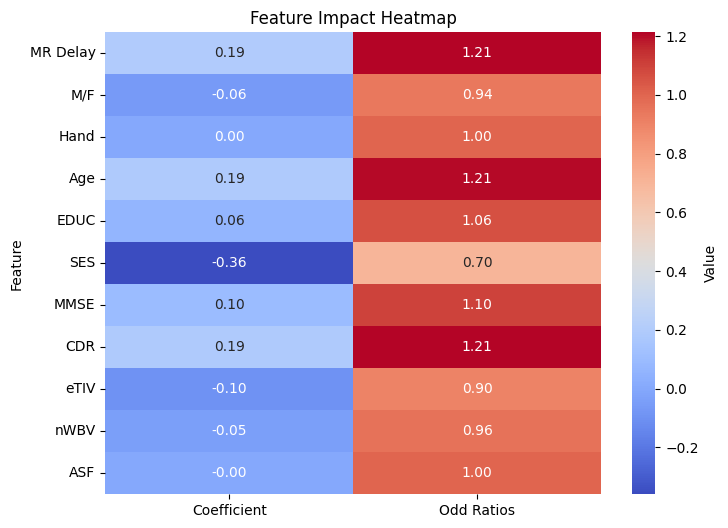



Factors contributing to likelihood according to coeff: 
+-----------+---------------+--------------+
| Feature   |   Coefficient |   Odd Ratios |
+===========+===============+==============+
| MR Delay  |     0.193298  |      1.21324 |
+-----------+---------------+--------------+
| Age       |     0.187464  |      1.20619 |
+-----------+---------------+--------------+
| EDUC      |     0.0627526 |      1.06476 |
+-----------+---------------+--------------+
| MMSE      |     0.0954466 |      1.10015 |
+-----------+---------------+--------------+
| CDR       |     0.189736  |      1.20893 |
+-----------+---------------+--------------+


Factors contributing to likelihood according to odd ratios:
+-----------+---------------+--------------+
| Feature   |   Coefficient |   Odd Ratios |
+===========+===============+==============+
| MR Delay  |     0.193298  |      1.21324 |
+-----------+---------------+--------------+
| Age       |     0.187464  |      1.20619 |
+-----------+------------

In [104]:
visualize(coeff)

##Gradient Boosting Classifier with Regularization##

In [114]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
perf(y_test,y_pred)

Accuracy:0.8533333333333334


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.91      0.97      0.94        32
           2       0.82      0.97      0.89        32

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.83      0.85      0.82        75



In [116]:
'''
GradientBoostingClassifier does not have a coef_ attribute because it is a tree-based model and not a linear model.'''
print(model.feature_importances_)

[0.06450182 0.0020446  0.         0.01722398 0.01832583 0.01788831
 0.03524712 0.75730962 0.01505489 0.05104009 0.02136374]


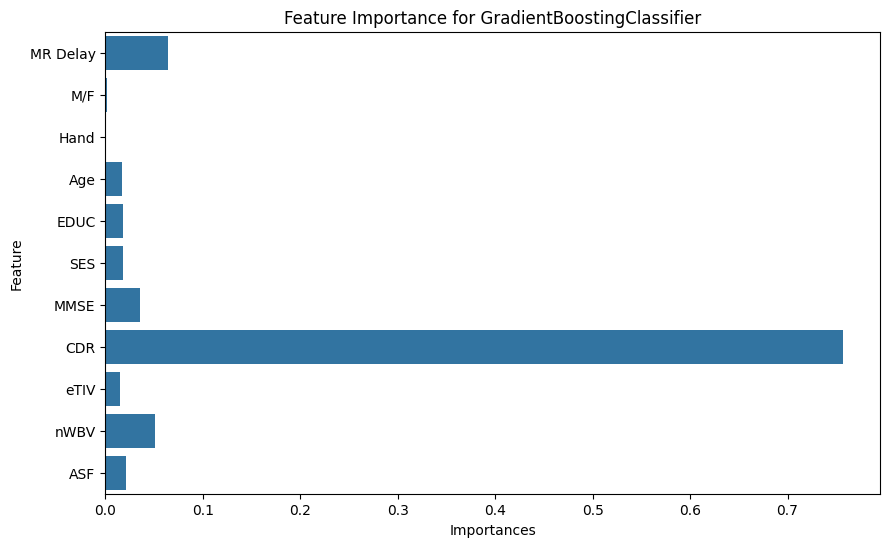

In [118]:
feature_imp = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importances': model.feature_importances_
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature', data=feature_imp)
plt.title('Feature Importance for GradientBoostingClassifier')
plt.show()


##Support Vector Machine with Regularization##

In [119]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=0.1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
perf(y_test,y_pred)

Accuracy:0.8533333333333334


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.94      0.97      0.95        32
           2       0.79      0.97      0.87        32

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75



In [121]:
coeff = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Coefficient': model.coef_[0]
})

coeff['Odd Ratios'] =  np.exp(coeff['Coefficient'])
print(coeff)

     Feature  Coefficient  Odd Ratios
0   MR Delay     0.312839    1.367301
1        M/F    -0.311641    0.732244
2       Hand     0.000000    1.000000
3        Age     0.236813    1.267204
4       EDUC     0.243531    1.275746
5        SES    -0.369551    0.691044
6       MMSE     0.324599    1.383475
7        CDR    -1.050058    0.349917
8       eTIV    -0.114596    0.891727
9       nWBV    -0.021153    0.979069
10       ASF     0.015766    1.015891


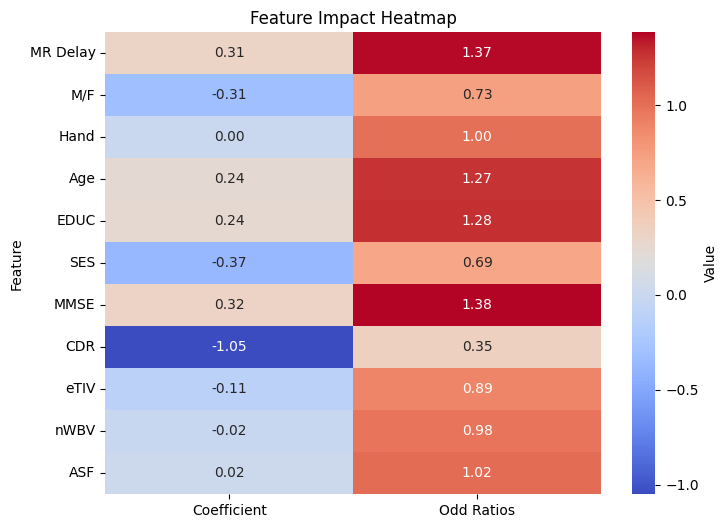



Factors contributing to likelihood according to coeff: 
+-----------+---------------+--------------+
| Feature   |   Coefficient |   Odd Ratios |
+===========+===============+==============+
| MR Delay  |      0.312839 |      1.3673  |
+-----------+---------------+--------------+
| Age       |      0.236813 |      1.2672  |
+-----------+---------------+--------------+
| EDUC      |      0.243531 |      1.27575 |
+-----------+---------------+--------------+
| MMSE      |      0.324599 |      1.38348 |
+-----------+---------------+--------------+
| ASF       |      0.015766 |      1.01589 |
+-----------+---------------+--------------+


Factors contributing to likelihood according to odd ratios:
+-----------+---------------+--------------+
| Feature   |   Coefficient |   Odd Ratios |
+===========+===============+==============+
| MR Delay  |      0.312839 |      1.3673  |
+-----------+---------------+--------------+
| Age       |      0.236813 |      1.2672  |
+-----------+------------

In [122]:
visualize(coeff)

##Random Forest with Regularization##

In [123]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, min_samples_leaf=2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [124]:
perf(y_test,y_pred)

Accuracy:0.84


Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.89      1.00      0.94        32
           2       0.79      0.97      0.87        32

    accuracy                           0.84        75
   macro avg       0.56      0.66      0.60        75
weighted avg       0.72      0.84      0.77        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


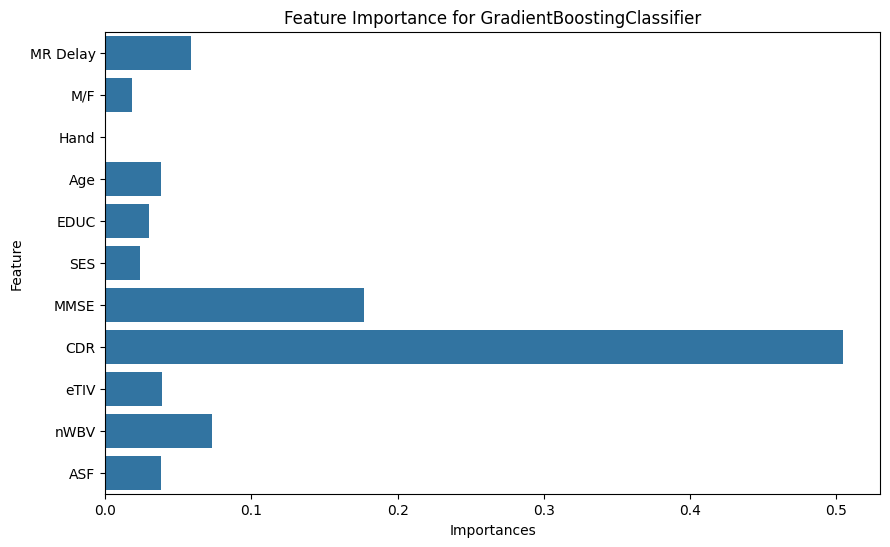

In [126]:
feature_imp = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importances': model.feature_importances_
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature', data=feature_imp)
plt.title('Feature Importance for GradientBoostingClassifier')
plt.show()